In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path='ml-20m/'
movies=pd.read_csv(path+'movies.csv')
tags=pd.read_csv(path+'tags.csv')
ratings=pd.read_csv(path+'ratings.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
movies['genres']=movies['genres'].str.replace('|',' ')

movies.head()

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
len(movies.movieId.unique())

27278

In [10]:
len(ratings.movieId.unique())

26744

In [11]:
ratings_f=ratings.groupby('userId').filter(lambda x:len(x)>=55)

In [12]:
movie_list_rating=ratings_f.movieId.unique().tolist()

In [13]:
len(ratings_f.movieId.unique())/len(movies.movieId.unique())

0.9785908057775496

In [14]:
len(ratings_f.userId.unique())/len(ratings.userId.unique())

0.5779786704021141

In [15]:
movies=movies[movies.movieId.isin(movie_list_rating)]

In [16]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
tags.drop(['timestamp'],axis=1,inplace=True)
ratings_f.drop(['timestamp'],axis=1,inplace=True)

In [18]:
mixed=pd.merge(movies,tags,on='movieId',how='left')
mixed.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Pixar animation
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,TÃ©a Leoni does not star in this movie


In [19]:
mixed.fillna(' ',inplace=True)
mixed=pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x:'%s'% ' '.join(x)))
Final=pd.merge(movies,mixed,on='movieId',how='left')
Final['metadata']=Final[['tag','genres']].apply(lambda x:' '.join(x),axis=1)
Final.head()

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Watched computer animation Disney animated fea...,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel adapted from:book board game child...,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy Romance,old people that is actually funny sequel fever...,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge characters chick flick cha...,chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Comedy,Diane Keaton family sequel Steve Martin weddin...,Diane Keaton family sequel Steve Martin weddin...


In [20]:
Final.shape

(26694, 5)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(Final['metadata'])
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),index=Final.index.tolist())

In [22]:
tfidf_df.shape

(26694, 23704)

In [23]:
tfidf_df.loc[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23699    0.0
23700    0.0
23701    0.0
23702    0.0
23703    0.0
Name: 0, Length: 23704, dtype: float64

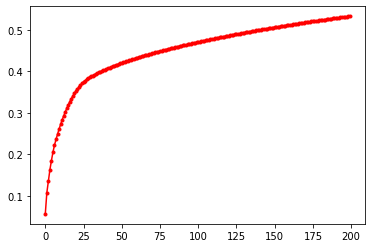

In [24]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=200)
latent_matrix=svd.fit_transform(tfidf_df)
explained=svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',color='red')
plt.show()

In [25]:
n=200
latent_matrix_df=pd.DataFrame(latent_matrix[:,0:n],index=Final.title.tolist())

In [26]:
latent_matrix_df.shape

(26694, 200)

In [27]:
ratings_f.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [28]:
ratings_f1=pd.merge(movies[['movieId']],ratings_f,on='movieId',how='right')

In [29]:
ratings_f2=ratings_f1.pivot(index='movieId',columns='userId',values='rating').fillna(0)

In [30]:
ratings_f2.head()

userId,1,2,3,5,7,8,11,13,14,16,...,138474,138475,138477,138483,138484,138486,138487,138490,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.5
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
latent_matrix_2=svd.fit_transform(ratings_f2)
latent_matrix_2_df=pd.DataFrame(latent_matrix_2,index=Final.title.tolist())

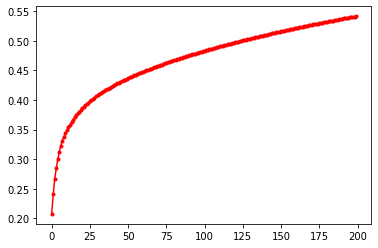

In [32]:
explained=svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',color='red')
plt.show()

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
a_1=np.array(latent_matrix_df.loc['Toy Story (1995)']).reshape(1,-1)
a_2=np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1,-1)

score1=cosine_similarity(latent_matrix_df,a_1).reshape(-1)
score2=cosine_similarity(latent_matrix_2_df,a_2).reshape(-1)

hybrid=(score1+score2)/2

dictDf={'content':score1,'collaborative':score2,'hybrid':hybrid}
similar=pd.DataFrame(dictDf,index=latent_matrix_df.index)

similar.sort_values('hybrid',ascending=False,inplace=True)
similar.head(11)

,content,collaborative,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Toy Story 2 (1999),0.964364,0.732555,0.848459
"Bug's Life, A (1998)",0.912520,0.641663,0.777091
"Monsters, Inc. (2001)",0.892227,0.614877,0.753552
Finding Nemo (2003),0.877487,0.595104,0.736296
"Incredibles, The (2004)",0.803508,0.562357,0.682932
Ice Age (2002),0.880710,0.481902,0.681306
Ratatouille (2007),0.905272,0.425925,0.665598
Antz (1998),0.750281,0.561675,0.655978
Toy Story 3 (2010),0.876955,0.405756,0.641356
